# Importing Libraries

In [163]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Read in Dataset

In [164]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [165]:
print(df.shape)

(918, 12)


- The dataset contains 918 observations. There are 11 features and the target to predict called 'HeartDisease'

# Exploratory Data Analysis

## Data types

In [166]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

- **Integer (Discrete) datatype:** Age, RestingBP, Cholesterol, FastingBS, MaxHR and HeartDisease


- **Object (Categorical) datatype:** Sex, ChestPainType, RestingECG, ExerciseAngina and ST_Slope


- **Float (Continuous) datatype:** Oldpeak

## Checking for Null values

In [167]:
# Sums the number of Nulls in each column

null_count = df.isnull().sum()
null_count

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- As there number of Nulls in each column of the dataset is 0, there are no Null values in the entire dataset

## Check for duplicate rows

In [168]:
duplicated = df[df.duplicated()] # Filters the dataframe to where duplicate rows are present
duplicated

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [169]:
print(duplicated.shape)

(0, 12)


- There are no duplicate rows within the Dataframe

## Checking for Class imbalance

In [170]:
print(df['HeartDisease'].value_counts()) # Computes the count of unique values
print(df['HeartDisease'].value_counts(normalize=True)*100) # Computes the count of unique values as a percentage

1    508
0    410
Name: HeartDisease, dtype: int64
1    55.337691
0    44.662309
Name: HeartDisease, dtype: float64


The dataset is slightly imbalanced. 

- The majority class is of those with Heart Disease at 508 observations constituting 55.34% of all observations


- The minority class is of those without Heart Disease at 410 observations constituting 44.66% of all observations


- This isn't a very imabalcned dataset

## Dataset descriptice statistics

In [171]:
df.describe().T # Transposes the descriptive statistics dataframe making it more user friendly to read

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


- Patients as young as 28 and old as 77 have been included in this study with an average age of 53. 


- It can be seen that some observations within this dataset do not appear to make sense. For example the minimum value for Blood Pressure is 0. Blood Pressure is essential at ensuring blood circulates throughout the body and therefore cannot be 0 as this would mean a person is not alive.


- Also, we find that Cholesterol too has a minimum value of 0. This also cannot be 0 as every person regardless of their state of health will have cholesterol

## Correlation Analysis

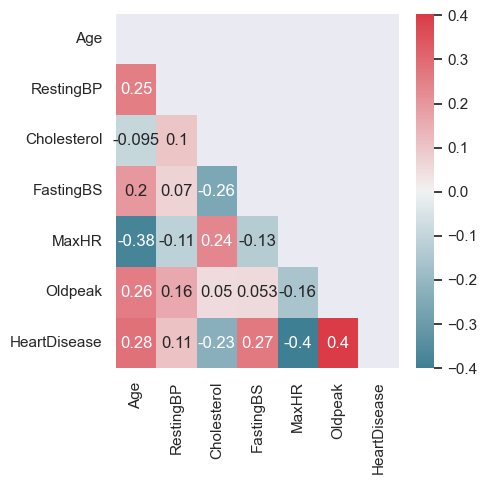

In [172]:
# sets the them for the plot
sns.set(style="darkgrid")

# creates a correlation datafarme of all the correlation values using the Pearson correlation coefficient
corr=df.corr()

# creates a figure and axis subplot
f, ax = plt.subplots(figsize=(5, 5))

# creates a color map based on colours specified in diverging palette function given here as 210 and 10
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# np.ones_like() usually returns an array of ones with the same shape and type as a given array in this case the given array
# is the correlation dataframe. As dtype has been specified as bool. The array thats returned consists of bools

# np.triu() returns a copy of an array with the elements below the `k`-th diagonal zeroed. however as the dtype in 
# np.ones_like() has been set as bool, where there would normally be zeroes are now false

mask = np.triu(np.ones_like(corr, dtype=bool))

# sns.heatmap(): Plots rectangular data as a color-encoded matrix.
# Data: The data is the correlation dataframe 'corr'
# cmap: The mapping from data values to color space.
# ax : Axes in which to draw the plot
# mask: If passed, data will not be shown in cells where ``mask`` is True. 

sns.heatmap(corr, annot=True, cmap=cmap, ax=ax, mask=mask)

# Adjust the padding between and around subplots.
f.tight_layout()


- With respect to our target 'HeartDisease', we find relatively strong positive correlations of Heart Disease with Age, FastingBS and Oldpeak


- Cholesterol has a negative correlation with Heart Disease. This is quite surprising as one would expect that cholesterol is a fatty substance that could clog arteries leading to heart attacks implying a positive correlation between the two although we do not find this here


- Other relatively strong correlations include that of MaxHR and Age with a value of -0.38. This makes sense as one would expect the maximum heart rate achieved by a person to reduce with their age

## Check for outliers

In [173]:
# Identify quantitative columns using is_numeric_dtype and setting it to True
quantitative_cols = [i for i in df.columns if is_numeric_dtype(df[i]) == True] 

# Remove HeartDisease as this is the target
quantitative_cols.remove('HeartDisease')

# Identify qualitative columns using is_numeric_dtype and setting it to False
qualitative_cols = [j for j in df.columns if is_numeric_dtype(df[j]) == False]


In [174]:
print(quantitative_cols)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


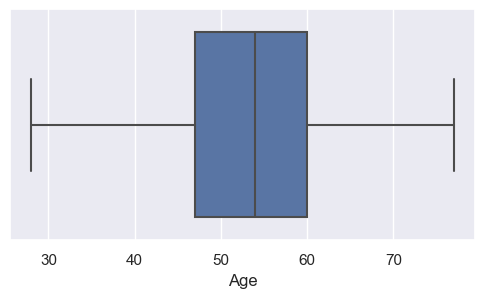

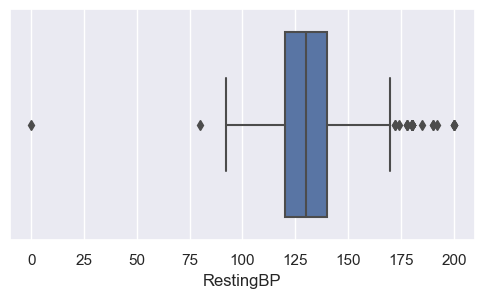

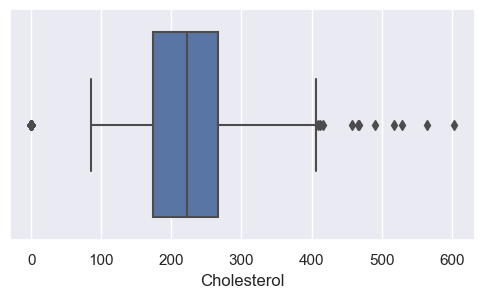

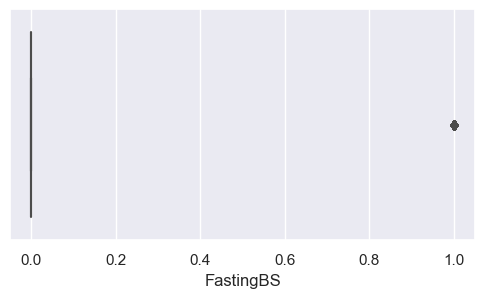

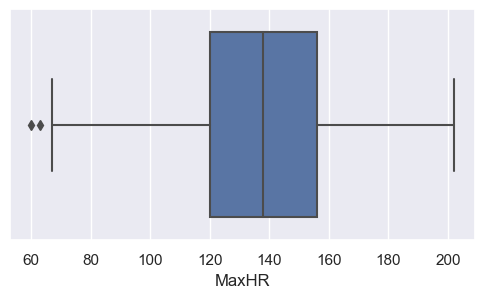

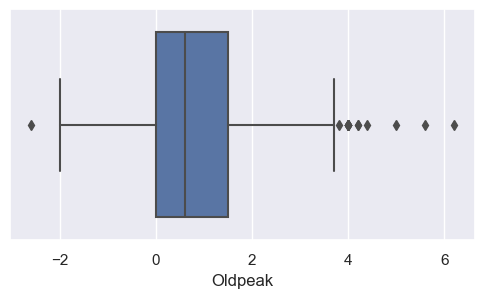

In [175]:
# Plot box plots in a for loop to identify outliers

for i in quantitative_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[i])
    plt.show()

For the quantitative features, there are some interesting observations:

- Age and FastingBS are the only features that do not have outliers. FastingBS is a feature that only has a binary response i.e. 1 or 0 so finding outliers for this feature isn't fruitful

We find outliers for the lower end and higher end of the boxplots for both RestingBP and Cholesterol. Before adressing these we must ascertain whether these outliers are anomalous, due to errors or are genuine observations.

- Cholesterol and RestingBP cannot be 0 therefore these datapoints are likely errors and need addressing in the data preprocessing stage. The other outliers may be geuine data points and removing them may introduce bias and impact the overall distribution and analysis


- Following this rationale, outliers for MaxHR and Oldpeak will not be removed as they will be considered genuine data points and there is no indication that these are the result of error.

## Distribution of features

### Quantitative features

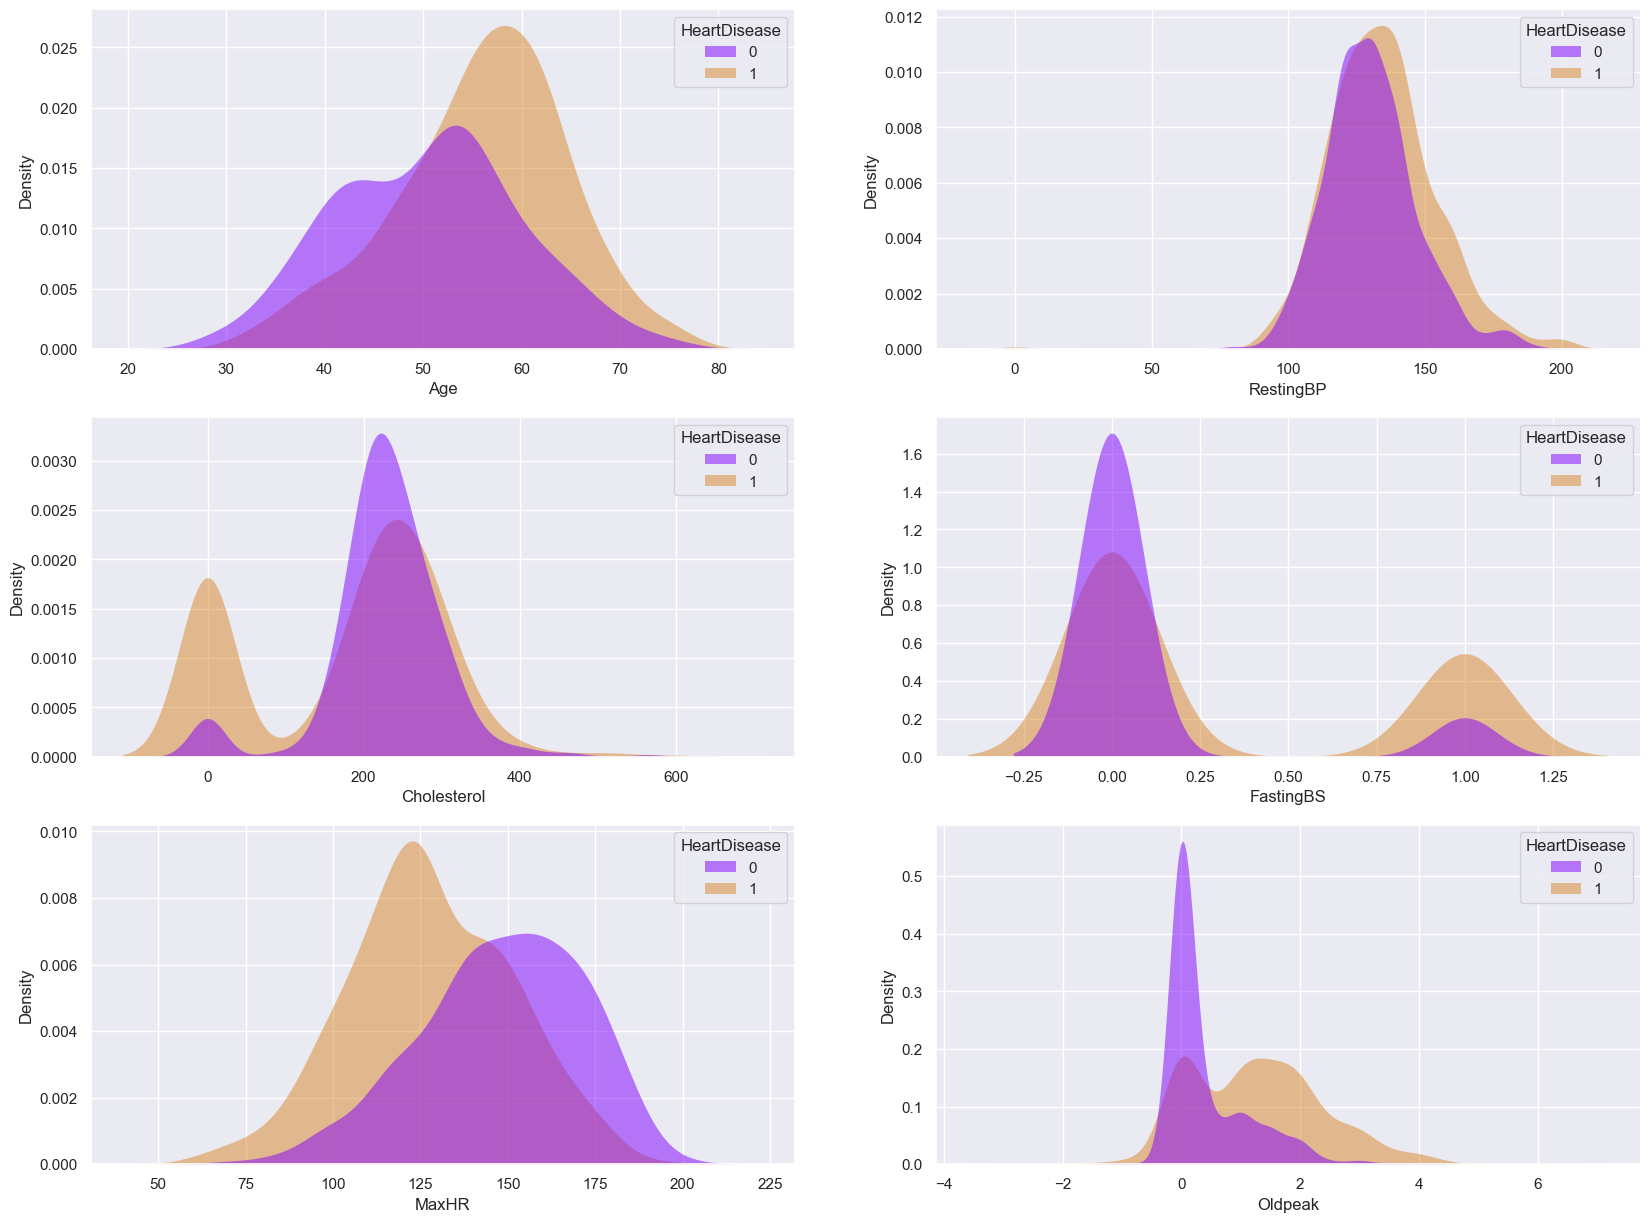

In [176]:
# fig and axis vars for subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# changes multidimensional array to 1d array
axes = axes.flatten()

# loops through column name and plots histogram and density plots to their relevant axis using their index
for i, column in enumerate(quantitative_cols):
    ax = axes[i]
    sns.kdeplot(ax=ax, data=df, x=column,hue="HeartDisease", fill=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
    
plt.show()

- It can be seen that the distribution for the vast majority of numerical features resembles a Normal or Gaussian distribution


- By focusing on what would be the mean/median/mode of these distribution assuming Gaussian behaviour, we find that the people with Heart Disease are older, have higher blood pressure, higher cholesterol and lower maximum heart rate


- There is no real distribution for FastingBS as this feature is a binary feature where is FastingBS is > 120 mg/dl it is 1 else it is 0


-  These features would benefit from pre-processing transformations

### Qualitative features

In [177]:
print(qualitative_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


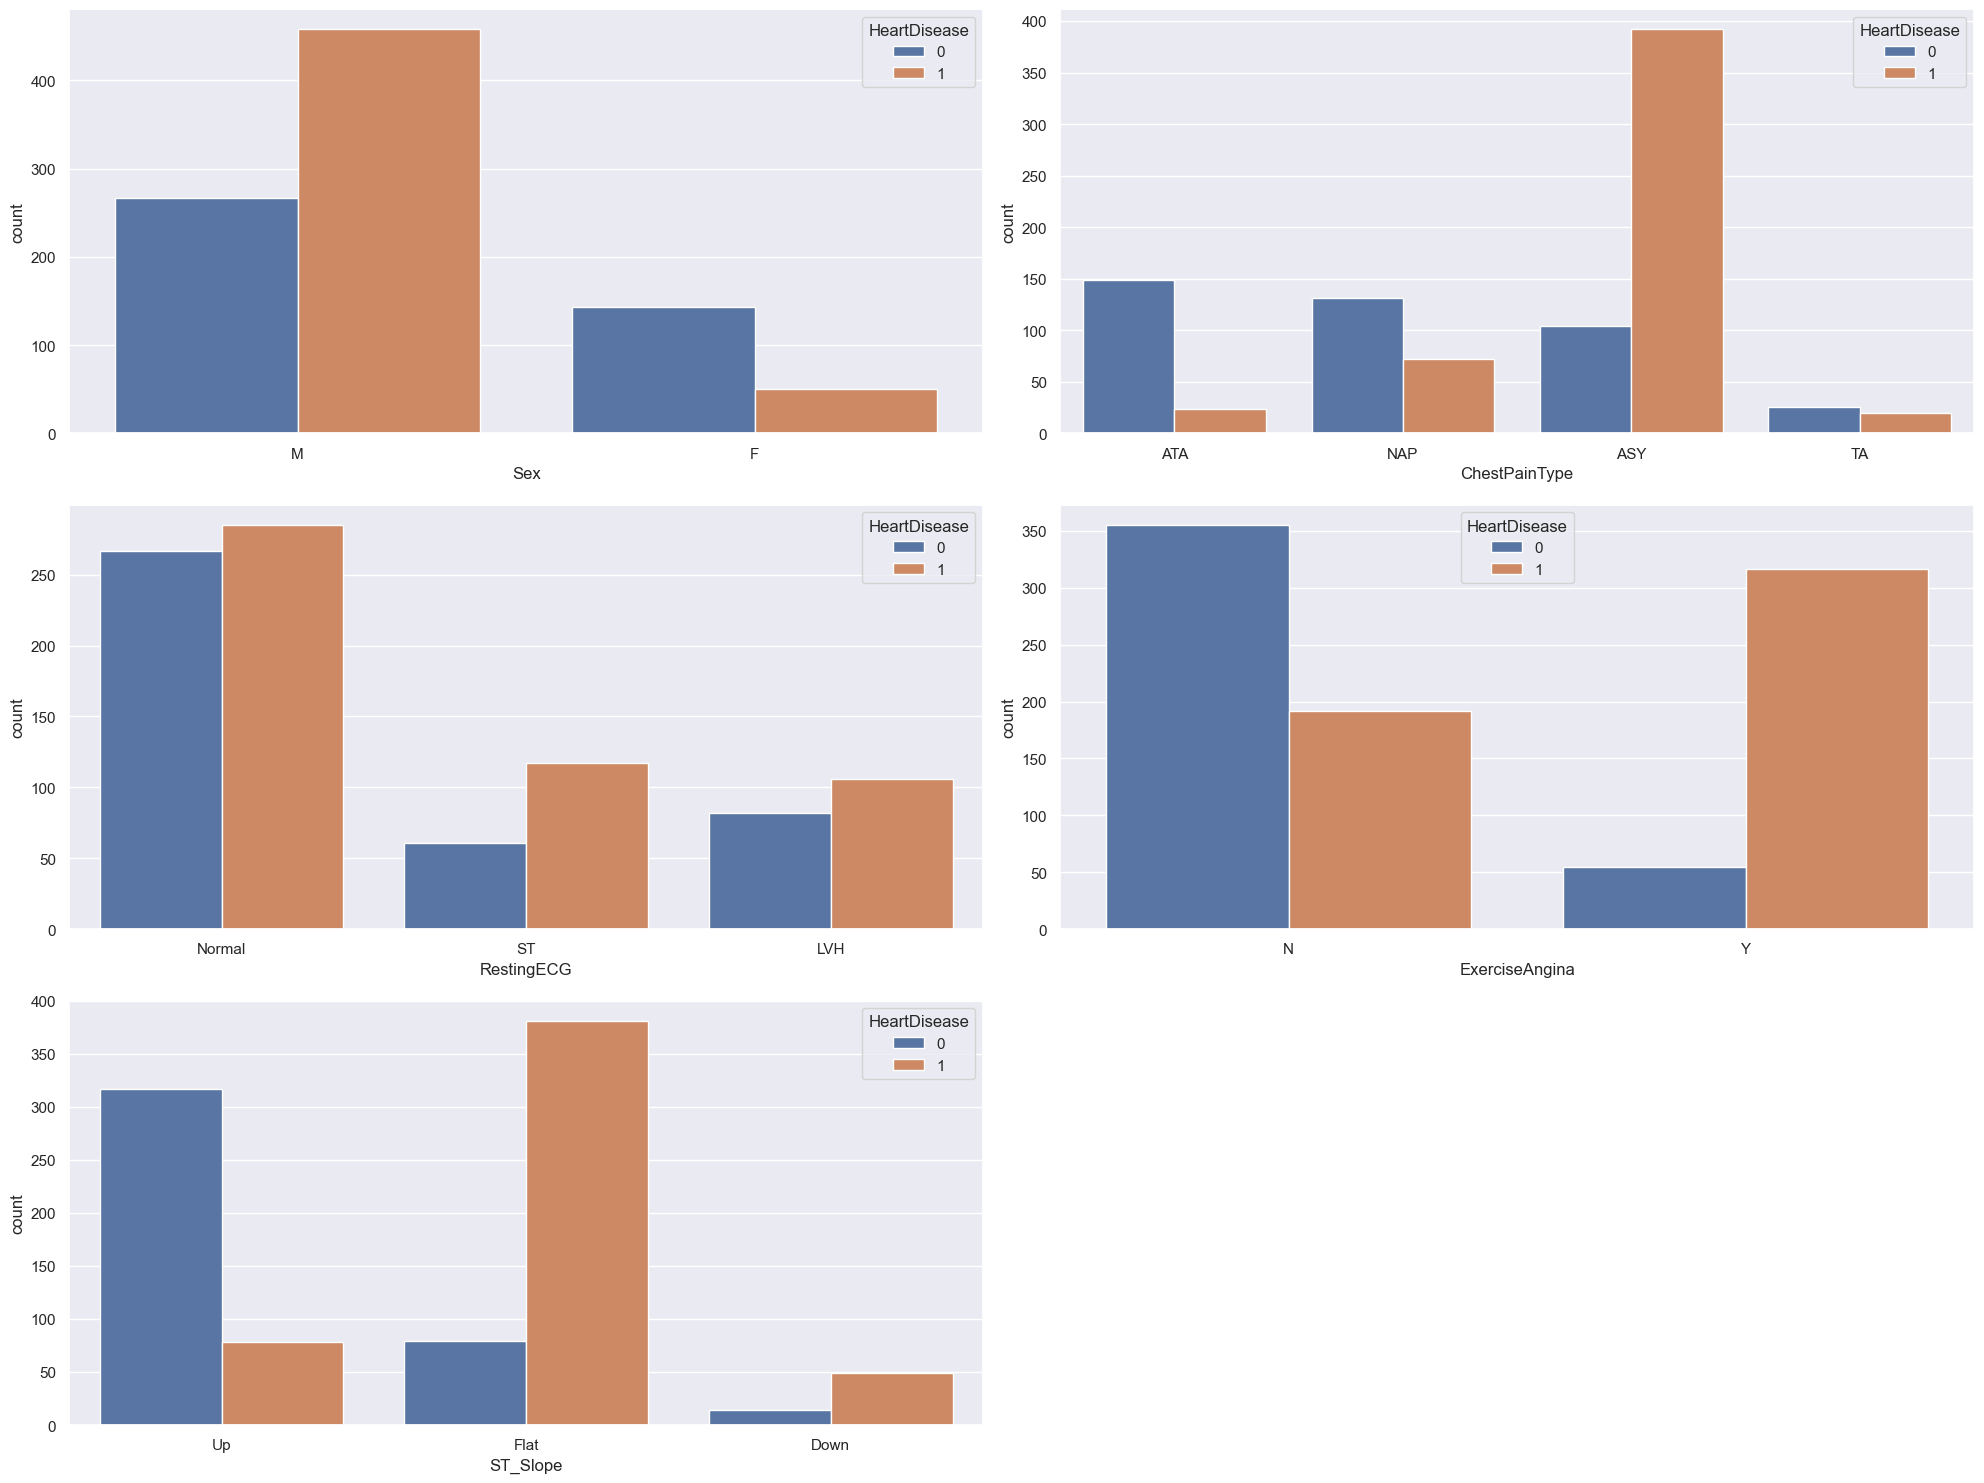

In [178]:
# Create a matplotlib figure and a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# Flatten the 2D array of axes to a 1D array
axes = axes.flatten()

# Loop through each subplot and plot a countplot
for i, ax in enumerate(axes):
    if i < len(qualitative_cols):
        sns.countplot(x=qualitative_cols[i], hue='HeartDisease', data=df, ax=ax)
    
    # Hide any remaining empty subplots
    else:
        ax.axis("off")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

- We find that more males than females experience Heart Disease


- Strangely, the vast majority of patients with Heart Disease do not experience any chest pain being ASY (Asymptomatic). There may be other underlying issues


- People with Heart Disease have similar amounts of Normal and LVH ECG's however those with Heart Disease have a higher count of ST


- The vast majority of patients who experience Exercise Angina have Heart Disease


- The vast majority of patients with Heart Disease have a Flat ST_Slope

# Data Pre-Processing

## Removing non-sensical observations

In the EDA, it was established that datapoints where Cholesterol or RestingBP is 0, are non-sensical and appear to be errors. Therfore, these datapoints will be removed

In [179]:
# Filter the dataframe to where RestingBP is > 0
df_pp = df[df['RestingBP']>0]

# Filter again to where Cholesterol > 0
df_pp = df_pp[df_pp['Cholesterol']>0]

df_pp

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [180]:
print(df_pp['HeartDisease'].value_counts())
print(df_pp['HeartDisease'].value_counts(normalize=True)*100)

0    390
1    356
Name: HeartDisease, dtype: int64
0    52.27882
1    47.72118
Name: HeartDisease, dtype: float64


- The classes remain balanced even after the removal of non-sensical observations

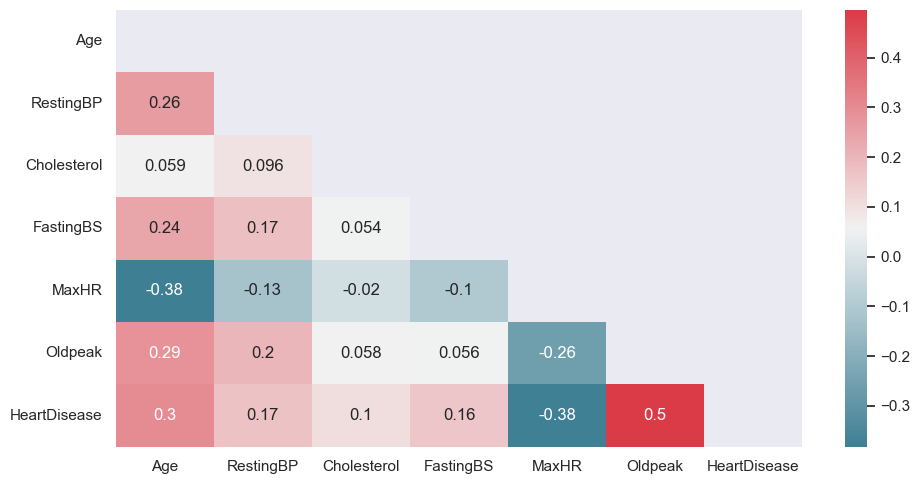

In [181]:
# sets the them for the plot
sns.set(style="darkgrid")

# creates a correlation datafarme of all the correlation values using the Pearson correlation coefficient
corr=df_pp.corr()

# creates a figure and axis subplot
f, ax = plt.subplots(figsize=(10, 5))

# creates a color map based on colours specified in diverging palette function given here as 210 and 10
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# np.ones_like() usually returns an array of ones with the same shape and type as a given array in this case the given array
# is the correlation dataframe. As dtype has been specified as bool. The array thats returned consists of bools

# np.triu() returns a copy of an array with the elements below the `k`-th diagonal zeroed. however as the dtype in 
# np.ones_like() has been set as bool, where there would normally be zeroes are now false

mask = np.triu(np.ones_like(corr, dtype=bool))

# sns.heatmap(): Plots rectangular data as a color-encoded matrix.
# Data: The data is the correlation dataframe 'corr'
# cmap: The mapping from data values to color space.
# ax : Axes in which to draw the plot
# mask: If passed, data will not be shown in cells where ``mask`` is True. 

sns.heatmap(corr, annot=True, cmap=cmap, ax=ax, mask=mask)

# Adjust the padding between and around subplots.
f.tight_layout()

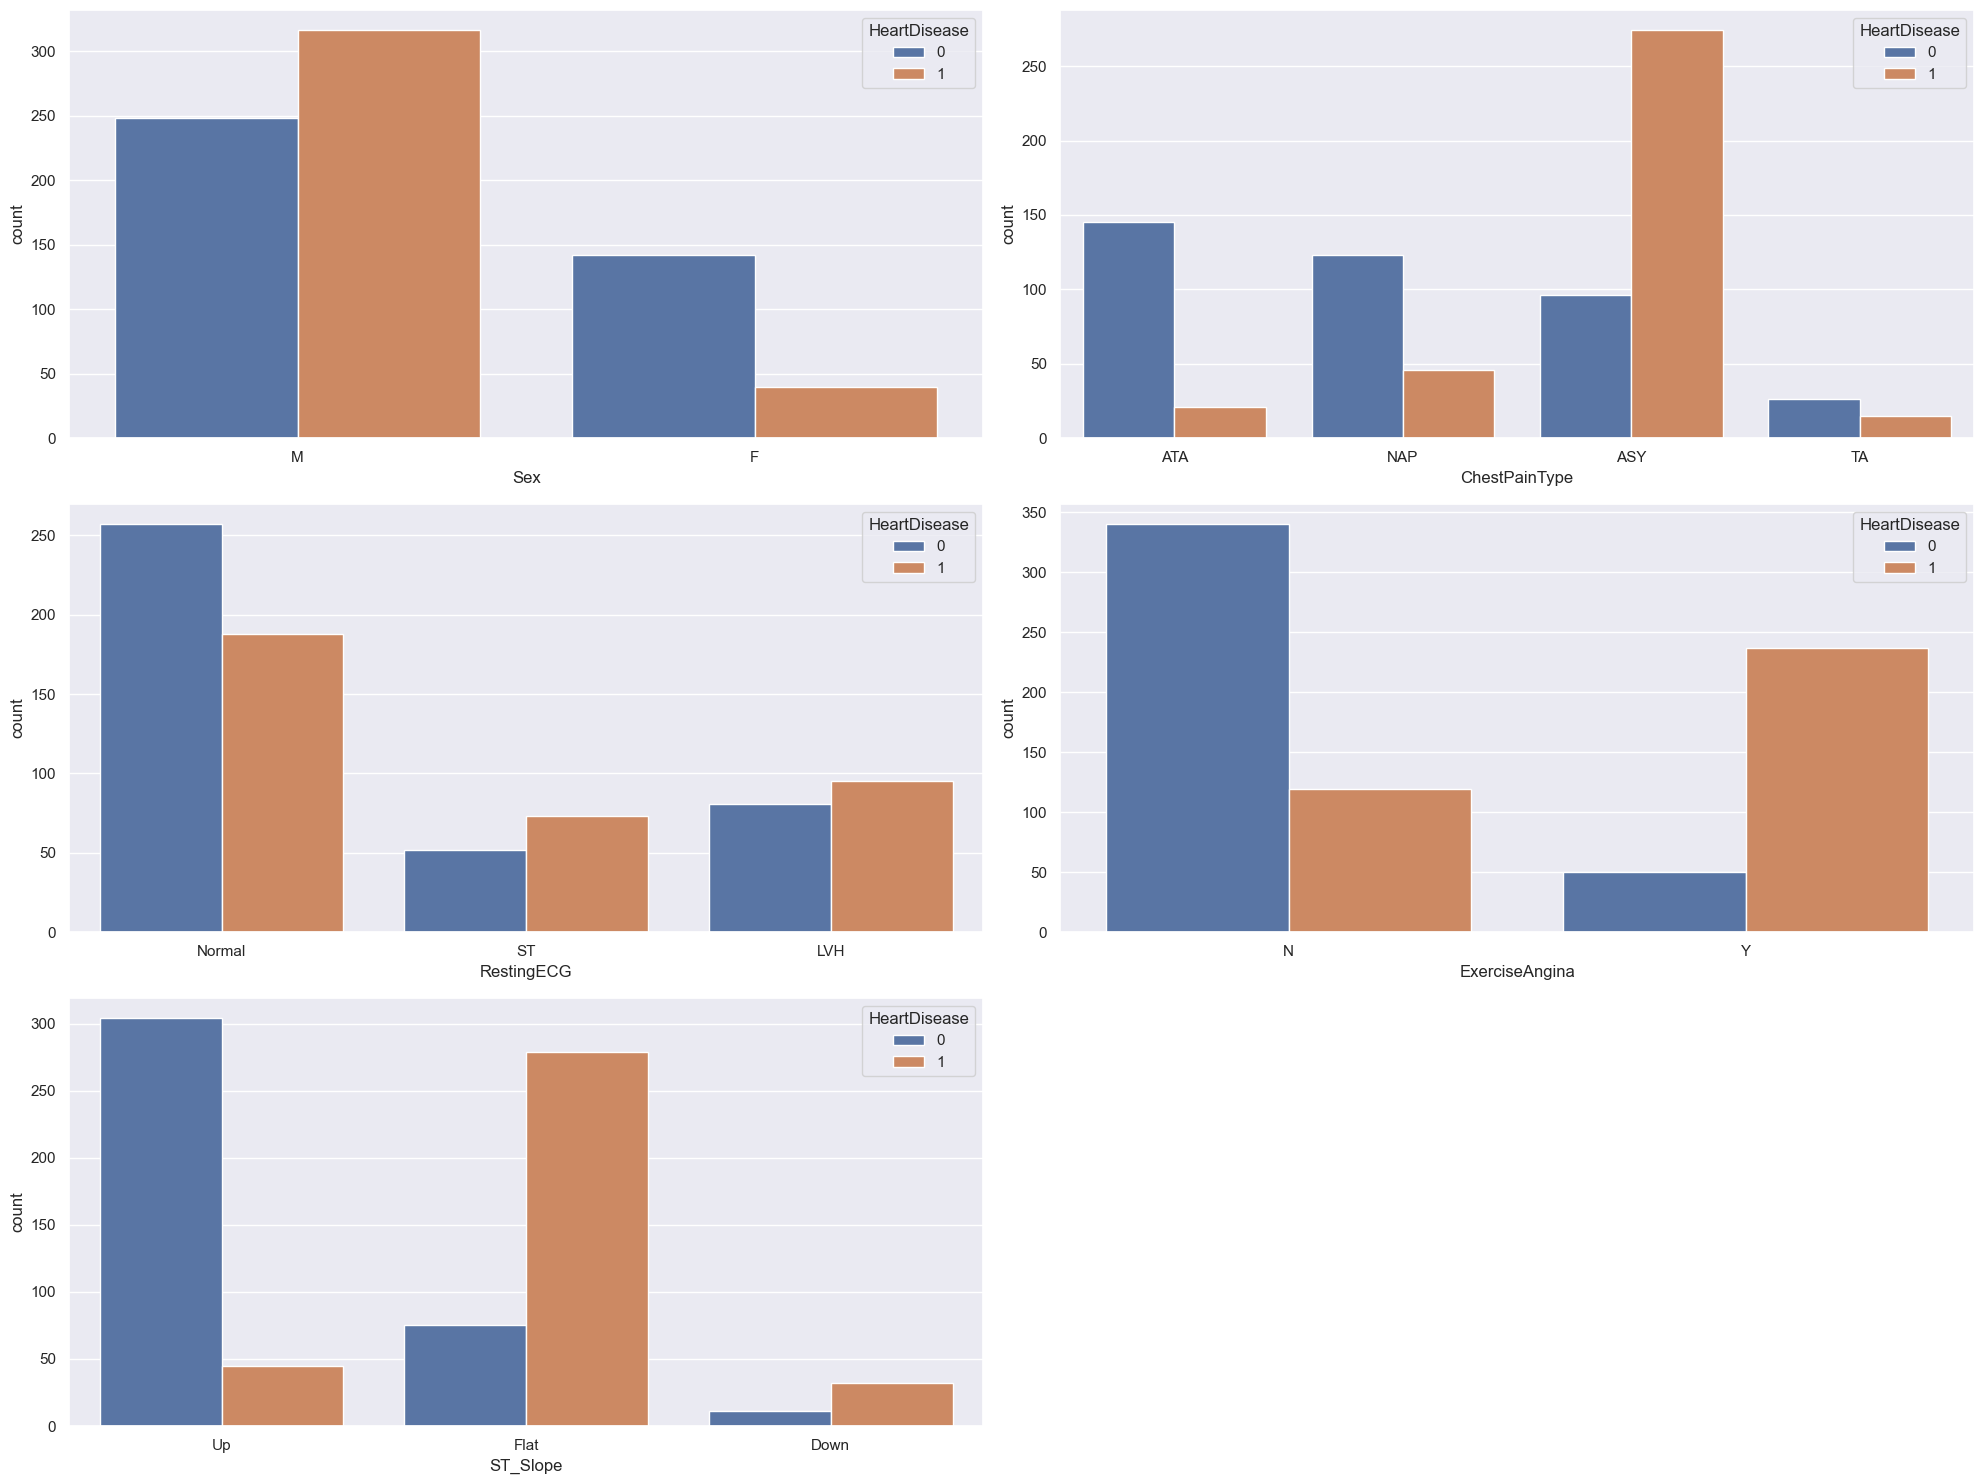

In [182]:
# Create a matplotlib figure and a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# Flatten the 2D array of axes to a 1D array
axes = axes.flatten()

# Loop through each subplot and plot a countplot
for i, ax in enumerate(axes):
    if i < len(qualitative_cols):
        sns.countplot(x=qualitative_cols[i], hue='HeartDisease', data=df_pp, ax=ax)
    
    # Hide any remaining empty subplots
    else:
        ax.axis("off")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Splitting data into features and target

In [183]:
# Features Dataframe excluding the target
X = df_pp.iloc[:,:-1]
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [184]:
y = df_pp['HeartDisease'] # This is the target variable
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 746, dtype: int64

## Changing Categorical data into a numerical representation

In [185]:
X = pd.get_dummies(X) # encodes quaitative columns using a binary representation
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


## Apply Standard Scaler transformation

In [186]:
ss = StandardScaler() # Subtracts the mean and scales to unit variance for each feature
scaled = ss.fit_transform(X)
X = pd.DataFrame(scaled, columns = X.columns)
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.356073,0.403980,0.750494,-0.448652,1.296470,-0.840942,-0.568063,0.568063,-0.991989,1.869218,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,0.790742,-0.790742,-0.247318,-0.950295,1.066553
1,-0.408656,1.561980,-1.093405,-0.448652,0.643613,0.091771,1.760370,-1.760370,-0.991989,-0.534983,1.847756,-0.241156,-0.555673,0.822438,-0.448652,0.790742,-0.790742,-0.247318,1.052304,-0.937600
2,-1.671879,-0.175019,0.648995,-0.448652,-1.722993,-0.840942,-0.568063,0.568063,-0.991989,1.869218,-0.541197,-0.241156,-0.555673,-1.215897,2.228901,0.790742,-0.790742,-0.247318,-0.950295,1.066553
3,-0.513925,0.288180,-0.518244,-0.448652,-1.314958,0.558127,1.760370,-1.760370,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-1.264636,1.264636,-0.247318,1.052304,-0.937600
4,0.117686,0.982980,-0.839657,-0.448652,-0.743708,-0.840942,-0.568063,0.568063,-0.991989,-0.534983,1.847756,-0.241156,-0.555673,0.822438,-0.448652,0.790742,-0.790742,-0.247318,-0.950295,1.066553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,-0.829731,-1.333019,0.327582,-0.448652,-0.335672,0.278313,-0.568063,0.568063,-0.991989,-0.534983,-0.541197,4.146700,-0.555673,0.822438,-0.448652,0.790742,-0.790742,-0.247318,1.052304,-0.937600
742,1.591446,0.635580,-0.873490,2.228901,0.031560,2.330281,-0.568063,0.568063,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,0.790742,-0.790742,-0.247318,1.052304,-0.937600
743,0.433492,-0.175019,-1.922314,-0.448652,-1.029333,0.278313,-0.568063,0.568063,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-1.264636,1.264636,-0.247318,1.052304,-0.937600
744,0.433492,-0.175019,-0.146081,-0.448652,1.378077,-0.840942,1.760370,-1.760370,-0.991989,1.869218,-0.541197,-0.241156,1.799621,-1.215897,-0.448652,0.790742,-0.790742,-0.247318,1.052304,-0.937600


# Feature Selection

- From the EDA, it was established from the correlation analysis that the features qithin the dataset do not exhibit stong correlations with eachother i.e. colineariity. Therefore, features were not removed.


- Furthermore, the dataset has a relatively low number of features with hence why these were not removed

# Model Development

## Test Train Split

In [187]:
# # Split the data into training and testing sets. the random state paramter has been allocated a random number of 29 to
# ensure the test train splits are consistent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [188]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
152,-1.356073,-0.175019,0.513663,-0.448652,0.398792,-0.840942,-0.568063,0.568063,-0.991989,1.869218,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,0.790742,-0.790742,-0.247318,-0.950295,1.066553
72,-0.092851,-0.754019,-1.059572,-0.448652,0.398792,-0.840942,-0.568063,0.568063,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,0.790742,-0.790742,-0.247318,1.052304,-0.937600
540,0.538760,-1.912019,-0.179914,-0.448652,0.643613,-0.747670,-0.568063,0.568063,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,0.790742,-0.790742,-0.247318,-0.950295,1.066553
590,-1.356073,-1.333019,-1.313319,-0.448652,-1.070136,1.024483,-0.568063,0.568063,1.008076,-0.534983,-0.541197,-0.241156,1.799621,-1.215897,-0.448652,-1.264636,1.264636,-0.247318,1.052304,-0.937600
489,-0.408656,-0.869819,-1.617817,-0.448652,-0.580494,-0.094772,-0.568063,0.568063,-0.991989,-0.534983,1.847756,-0.241156,1.799621,-1.215897,-0.448652,0.790742,-0.790742,-0.247318,-0.950295,1.066553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1.170372,0.577680,1.038075,2.228901,-1.029333,0.837941,-0.568063,0.568063,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,-1.215897,2.228901,-1.264636,1.264636,-0.247318,1.052304,-0.937600
546,0.433492,1.851480,0.750494,2.228901,-0.662101,0.091771,-0.568063,0.568063,1.008076,-0.534983,-0.541197,-0.241156,1.799621,-1.215897,-0.448652,0.790742,-0.790742,-0.247318,1.052304,-0.937600
509,-0.198119,0.403980,0.276832,-0.448652,1.867720,-0.840942,-0.568063,0.568063,1.008076,-0.534983,-0.541197,-0.241156,1.799621,-1.215897,-0.448652,-1.264636,1.264636,-0.247318,-0.950295,1.066553
236,-1.250805,-0.754019,1.545570,-0.448652,-0.906922,1.957196,-0.568063,0.568063,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-1.264636,1.264636,-0.247318,1.052304,-0.937600


In [189]:
X_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
463,1.486177,-0.754019,-0.264496,-0.448652,-0.458083,1.584111,-0.568063,0.568063,1.008076,-0.534983,-0.541197,-0.241156,1.799621,-1.215897,-0.448652,-1.264636,1.264636,-0.247318,1.052304,-0.937600
6,-0.829731,-0.175019,-0.129164,-0.448652,1.214863,-0.840942,1.760370,-1.760370,-0.991989,1.869218,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,0.790742,-0.790742,-0.247318,-0.950295,1.066553
403,0.328223,0.230280,0.632079,2.228901,-0.580494,0.278313,-0.568063,0.568063,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-1.264636,1.264636,-0.247318,1.052304,-0.937600
53,-1.250805,-0.175019,0.006168,-0.448652,0.398792,-0.840942,1.760370,-1.760370,-0.991989,1.869218,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,0.790742,-0.790742,-0.247318,-0.950295,1.066553
181,-0.198119,-0.175019,-0.349079,-0.448652,0.398792,-0.840942,-0.568063,0.568063,-0.991989,1.869218,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,0.790742,-0.790742,-0.247318,-0.950295,1.066553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,-0.303388,2.140980,-0.602826,-0.448652,-0.988529,-0.840942,-0.568063,0.568063,-0.991989,1.869218,-0.541197,-0.241156,-0.555673,-1.215897,2.228901,0.790742,-0.790742,-0.247318,-0.950295,1.066553
111,0.433492,0.982980,0.175333,-0.448652,-1.967815,1.957196,-0.568063,0.568063,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-1.264636,1.264636,-0.247318,1.052304,-0.937600
73,-0.934999,-0.754019,-0.450578,-0.448652,-1.029333,-0.840942,1.760370,-1.760370,1.008076,-0.534983,-0.541197,-0.241156,-0.555673,-1.215897,2.228901,0.790742,-0.790742,-0.247318,-0.950295,1.066553
235,-1.461342,-0.754019,-0.755075,-0.448652,0.806828,0.091771,-0.568063,0.568063,-0.991989,1.869218,-0.541197,-0.241156,-0.555673,0.822438,-0.448652,-1.264636,1.264636,-0.247318,1.052304,-0.937600


In [190]:
y_train

152    0
72     1
712    1
762    1
661    1
      ..
531    1
718    1
681    0
236    1
543    1
Name: HeartDisease, Length: 596, dtype: int64

In [191]:
y_test

635    1
6      0
575    1
53     0
181    0
      ..
191    0
111    1
73     0
235    0
794    0
Name: HeartDisease, Length: 150, dtype: int64

# KNN Model

In [ ]:
# Introduce the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid
grid = {
    'n_neighbors': list(range(1,31)),
    'weights' : ['uniform', 'distance']
}

# Call the grid search function specifying the required parameters
grid_search = GridSearchCV(estimator=knn, param_grid=grid, cv=5, scoring='accuracy')

# Train the training set
result = grid_search.fit(X_train, y_train)

In [193]:
# Isolate the tuned hyperparameters and the training accuracy
print("Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Hyperparameters : {'n_neighbors': 16, 'weights': 'distance'}
Accuracy : 0.8725070028011205


In [194]:
# Get the best model as determined by GridSearchCV
best_model = grid_search.best_estimator_
best_model

KNeighborsClassifier(n_neighbors=16, weights='distance')

In [195]:
# Fit the best model on the train data
best_model.fit(X_train, y_train)

# Predict on test data
y_pred_knn = best_model.predict(X_test)

# calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

In [196]:
print('Confusion Matrix KNN')
confusion_matrix(y_test, y_pred_knn)

Confusion Matrix KNN


array([[58, 11],
       [11, 70]], dtype=int64)

In [197]:
print("Accuracy:", accuracy_knn)
print("Recall:", recall_knn)

Accuracy: 0.8533333333333334
Recall: 0.8641975308641975


# Logistic Regression Model

In [198]:
# Introduce the KNN model
lr = LogisticRegression()

# Define the parameter grid
grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Call the grid search function specifying the required parameters
grid_search = GridSearchCV(estimator=lr, param_grid=grid, cv=5, scoring='accuracy')

# Train the training set
result = grid_search.fit(X_train, y_train)

In [199]:
# Isolate the tuned hyperparameters and the training accuracy
print("Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Hyperparameters : {'C': 0.01}
Accuracy : 0.8657563025210084


In [200]:
# Get the best model as determined by GridSearchCV
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=0.01)

In [201]:
# Fit the best model on the train data
best_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = best_model.predict(X_test)

# calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

In [202]:
print('Confusion Matrix Linear Regression')
confusion_matrix(y_test, y_pred_lr)

Confusion Matrix Linear Regression


array([[59, 10],
       [10, 71]], dtype=int64)

In [203]:
print("Accuracy:", accuracy_lr)
print("Recall:", recall_lr)

Accuracy: 0.8666666666666667
Recall: 0.8765432098765432


# Decision Tree Model

In [204]:
# Introduce the KNN model
dt = DecisionTreeClassifier()

# Define the parameter grid
grid = {
    'max_depth': list(range(1,31))
}

# Call the grid search function specifying the required parameters
grid_search = GridSearchCV(estimator=dt, param_grid=grid, cv=5, scoring='accuracy')

# Train the training set
result = grid_search.fit(X_train, y_train)

In [205]:
# Isolate the tuned hyperparameters and the training accuracy
print("Hyperparameters :", grid_search.best_params_)
print("Accuracy :",grid_search.best_score_)

Hyperparameters : {'max_depth': 1}
Accuracy : 0.8305602240896359


In [206]:
# Get the best model as determined by GridSearchCV
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=1)

In [207]:
# Fit the best model on the train data
best_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = best_model.predict(X_test)

# calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

In [208]:
print('Confusion Matrix Decision Tree')
confusion_matrix(y_test, y_pred_dt)

Confusion Matrix Decision Tree


array([[51, 18],
       [12, 69]], dtype=int64)

In [210]:
print("Accuracy:", accuracy_dt)
print("Recall:", recall_dt)

Accuracy: 0.8
Recall: 0.8518518518518519


# Voting Ensemble

In [228]:
df_VE = pd.DataFrame({
    'KNN':y_pred_knn,
    'Logistic Regression':y_pred_lr,
    'Decision Tree':y_pred_dt,
    'Test':y_test
})

# If the sum of values across a row for KNN, Logistic Regression and Decision Tree is >= 2, the classification is 1, 
# otherwise it is 0. This establishes the majority vote logic.
df_VE['Voting Ensemble'] = np.where((df_VE['KNN']+df_VE['Logistic Regression']+df_VE['Decision Tree'])>=2,1,0)

# Rearrange the columns
df_VE = df_VE[['KNN', 'Logistic Regression', 'Decision Tree', 'Voting Ensemble', 'Test']]

# Define conditions for TP, TN, FP, FN
TP = (df_VE['Voting Ensemble'] == 1) & (df_VE['Test'] == 1)
TN = (df_VE['Voting Ensemble'] == 0) & (df_VE['Test'] == 0)
FP = (df_VE['Voting Ensemble'] == 1) & (df_VE['Test'] == 0)
FN = (df_VE['Voting Ensemble'] == 0) & (df_VE['Test'] == 1)

# Apply np.where with multiple conditions
df_VE['Val'] = np.where(TP, 'TP', np.where(TN, 'TN', np.where(FP, 'FP', np.where(FN, 'FN', 'None'))))

# Isolate the Voting Ensemble, Test and Val columns
df_VE = df_VE[['Voting Ensemble', 'Test', 'Val']]
df_VE

,Voting Ensemble,Test,Val
635,1,1,TP
6,0,0,TN
575,1,1,TP
53,0,0,TN
181,0,0,TN
...,...,...,...
191,0,0,TN
111,1,1,TP
73,0,0,TN
235,1,0,FP


In [229]:
df_VE['Val'].value_counts()

TP    72
TN    59
FP    10
FN     9
Name: Val, dtype: int64

In [230]:
# Calculate Accuracy and Recall

print("Accuracy:", (72+59)/(72+59+10+9))
print("Recall:", 72/(72+9))

Accuracy: 0.8733333333333333
Recall: 0.8888888888888888
